# Training RL Agent in Gridworld with Temporal Difference learning method

## Imports

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Gridworld

In [ ]:
class GridworldV2Env(gym.Env):
    def __init__(self, step_cost=-0.2, max_ep_length=500, explore_start=False):
        self.index_to_coordinate_map = {
            "0": [0, 0],
            "1": [0, 1],
            "2": [0, 2],
            "3": [0, 3],
            "4": [1, 0],
            "5": [1, 1],
            "6": [1, 2],
            "7": [1, 3],
            "8": [2, 0],
            "9": [2, 1],
            "10": [2, 2],
            "11": [2, 3],
        }
        self.coordinate_to_index_map = {
            str(val): int(key) for key, val in self.index_to_coordinate_map.items()
        }
        self.map = np.zeros((3, 4))
        self.observation_space = gym.spaces.Discrete(1)
        self.distinct_states = [str(i) for i in range(12)]
        self.goal_coordinate = [0, 3]
        self.bomb_coordinate = [1, 3]
        self.wall_coordinate = [1, 1]
        self.goal_state = self.coordinate_to_index_map[str(self.goal_coordinate)]  # 3
        self.bomb_state = self.coordinate_to_index_map[str(self.bomb_coordinate)]  # 7
        self.map[self.goal_coordinate[0]][self.goal_coordinate[1]] = 1
        self.map[self.bomb_coordinate[0]][self.bomb_coordinate[1]] = -1
        self.map[self.wall_coordinate[0]][self.wall_coordinate[1]] = 2

        self.exploring_starts = explore_start
        self.state = 8
        self.done = False
        self.max_ep_length = max_ep_length
        self.steps = 0
        self.step_cost = step_cost
        self.action_space = gym.spaces.Discrete(4)
        self.action_map = {"UP": 0, "RIGHT": 1, "DOWN": 2, "LEFT": 3}
        self.possible_actions = list(self.action_map.values())

    def reset(self):
        self.done = False
        self.steps = 0
        self.map = np.zeros((3, 4))
        self.map[self.goal_coordinate[0]][self.goal_coordinate[1]] = 1
        self.map[self.bomb_coordinate[0]][self.bomb_coordinate[1]] = -1
        self.map[self.wall_coordinate[0]][self.wall_coordinate[1]] = 2

        if self.exploring_starts:
            self.state = np.random.choice([0, 1, 2, 4, 6, 8, 9, 10, 11])
        else:
            self.state = 8
        return self.state

    def get_next_state(self, current_position, action):

        next_state = self.index_to_coordinate_map[str(current_position)].copy()

        if action == 0 and next_state[0] != 0 and next_state != [2, 1]:
            # Move up
            next_state[0] -= 1
        elif action == 1 and next_state[1] != 3 and next_state != [1, 0]:
            # Move right
            next_state[1] += 1
        elif action == 2 and next_state[0] != 2 and next_state != [0, 1]:
            # Move down
            next_state[0] += 1
        elif action == 3 and next_state[1] != 0 and next_state != [1, 2]:
            # Move left
            next_state[1] -= 1
        else:
            pass
        return self.coordinate_to_index_map[str(next_state)]

    def step(self, action):
        assert action in self.possible_actions, f"Invalid action:{action}"

        current_position = self.state
        next_state = self.get_next_state(current_position, action)

        self.steps += 1

        if next_state == self.goal_state:
            reward = 1
            self.done = True

        elif next_state == self.bomb_state:
            reward = -1
            self.done = True
        else:
            reward = self.step_cost

        if self.steps == self.max_ep_length:
            self.done = True

        self.state = next_state
        return next_state, reward, self.done

## Visualization function

In [ ]:
def visualize_grid_state_values(grid_state_values):
    """Visualizes the state value function for the grid"""
    plt.figure(figsize=(10, 5))
    p = sns.heatmap(
        grid_state_values,
        cmap="Greens",
        annot=True,
        fmt=".1f",
        annot_kws={"size": 16},
        square=True,
    )
    p.set_ylim(len(grid_state_values) + 0.01, -0.01)
    plt.show()

## Temporal Difference learning method

In [ ]:
def temporal_difference_learning(env, max_episodes):
    grid_state_values = np.zeros((len(env.distinct_states), 1))
    grid_state_values[env.goal_state] = 1
    grid_state_values[env.bomb_state] = -1
    # v: state-value function
    v = grid_state_values
    gamma = 0.99  # Discount factor
    alpha = 0.01  # learning rate

    for episode in range(max_episodes):
        state = env.reset()
        done = False
        while not done:
            action = env.action_space.sample()  # random policy
            next_state, reward, done = env.step(action)

            # State-value function updates using TD(0)
            v[state] += alpha * (reward + gamma * v[next_state] - v[state])
            state = next_state
    visualize_grid_state_values(grid_state_values.reshape((3, 4)))

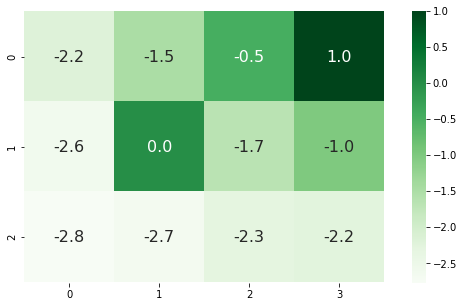

In [ ]:
if __name__ == "__main__":
    max_episodes = 4000
    env = GridworldV2Env(step_cost=-0.1, max_ep_length=30)
    temporal_difference_learning(env, max_episodes)

---

In [ ]:
!pip install -q watermark
%reload_ext watermark
%watermark -a "Sparsh A." -m -iv -u -t -d

Author: Sparsh A.

Last updated: 2021-12-02 10:43:44

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 5.4.104+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

gym       : 0.17.3
matplotlib: 3.2.2
numpy     : 1.19.5
seaborn   : 0.11.2
IPython   : 5.5.0



---

**END**